In [1]:
import pandas as pd
import numpy as np

D:\rgzn\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\rgzn\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\rgzn\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#查看数据集
df = pd.read_csv('2015.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
#把要用来测试的数据集单独展示出来
data = list(df.columns[3:])
data = df[data]
data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

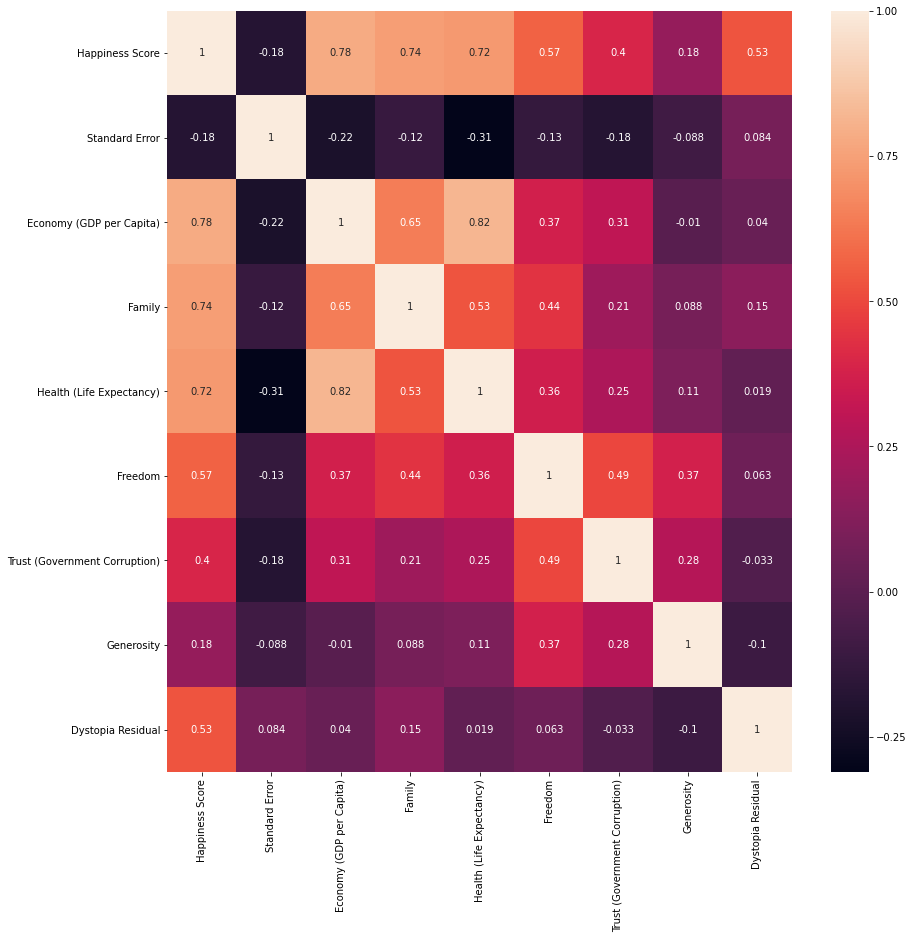

In [5]:
#画热力图，看看哪些参数影响较大
corr = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True)
plt.show()

In [6]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [7]:

train_x = data[['Economy (GDP per Capita)','Family','Health (Life Expectancy)']]
#用z-score对数据进行规范化
ss = preprocessing.StandardScaler()
train_x = ss.fit_transform(train_x)

In [8]:
#kmean算法
clf = KMeans(n_clusters=3)
print(clf)
pre = clf.fit_predict(train_x)
print(pre)
#中心点
print(clf.cluster_centers_)
print(clf.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1
 1 1 1 2 1 1 2 1 1 1 2 1 1 0 0 1 2 1 1 2 1 1 2 1 1 1 2 0 1 0 1 2 1 1 2 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 2 0 1 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2]
[[ 0.96975956  0.79571331  0.844865  ]
 [-0.02419754 -0.13979794  0.17017112]
 [-1.23288205 -0.88401309 -1.27756001]]
147.1339081471416


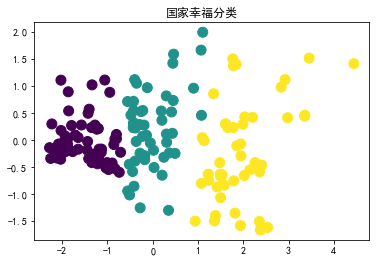

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # 输出三维
newData = pca.fit_transform(train_x)  # 载入N维

x = [n[0] for n in newData]
y = [n[1] for n in newData]
plt.rcParams['font.sans-serif'] = ['SimHei']  # 支持中文
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(x, y, c=pre, s=100)
# plt.legend()
plt.title("国家幸福分类")
plt.savefig('国家幸福分类图.jpg')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [11]:
#分割数据，将25%的数据作为测试集，其余作为训练集
train_x,test_x,train_y,test_y = train_test_split(train_x,data['Happiness Score'],test_size=0.25)

In [12]:
#线性回归预测
clf = LinearRegression()
clf.fit(train_x,train_y)
#预测幸福分数
predict_y = clf.predict(test_x)
#算出它的正确率，正确率在77%算是较为高的比分
score = r2_score(test_y, predict_y)
score

0.7756603887152054

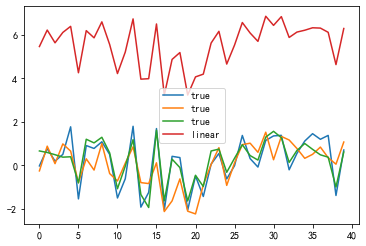

In [18]:
#查看图像，总体趋势一样
plt.plot(test_x, label='true')
plt.plot(predict_y, label='linear')
plt.legend()